## Example : total GDP to GDP per capita

In [30]:
import pandas as pd

df = pd.read_csv('https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/pandas/data/test_pwt.csv')
df

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.999500,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000,19053.186,1.724830,5.418047e+05,67.759026,6.720098
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954
5,South Africa,ZAF,2000,45064.098,6.939830,2.272424e+05,72.718710,5.726546
6,United States,USA,2000,282171.957,1.000000,9.898700e+06,72.347054,6.032454
7,Uruguay,URY,2000,3219.793,12.099592,2.525596e+04,78.978740,5.108068


In [41]:
type(df['year'][0])

numpy.int64

We can select particular rows using standard Python array slicing notation

In [2]:
df[2:5]

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954


To select columns, we can pass a list containing the names of the desired columns represented as strings

In [3]:
df[['country', 'tcgdp']]

,country,tcgdp
0,Argentina,2.950722e+05
1,Australia,5.418047e+05
2,India,1.728144e+06
3,Israel,1.292539e+05
4,Malawi,5.026222e+03
5,South Africa,2.272424e+05
6,United States,9.898700e+06
7,Uruguay,2.525596e+04


In [4]:
df.iloc[2:5, 0:4]

,country,country isocode,year,POP
2,India,IND,2000,1006300.297
3,Israel,ISR,2000,6114.570
4,Malawi,MWI,2000,11801.505


To select rows and columns using a mixture of integers and labels, the loc attribute can be used in a similar way

In [5]:
df.loc[df.index[2:5], ['country', 'tcgdp']]

,country,tcgdp
2,India,1.728144e+06
3,Israel,1.292539e+05
4,Malawi,5.026222e+03


Let’s imagine that we’re only interested in population and total GDP (tcgdp).

One way to strip the data frame df down to only these variables is to overwrite the dataframe using the selection method described above

In [6]:
df = df[['country', 'POP', 'tcgdp']]
df

,country,POP,tcgdp
0,Argentina,37335.653,2.950722e+05
1,Australia,19053.186,5.418047e+05
2,India,1006300.297,1.728144e+06
3,Israel,6114.570,1.292539e+05
4,Malawi,11801.505,5.026222e+03
5,South Africa,45064.098,2.272424e+05
6,United States,282171.957,9.898700e+06
7,Uruguay,3219.793,2.525596e+04


Here the index 0, 1,..., 7 is redundant because we can use the country names as an index.

To do this, we set the index to be the country variable in the dataframe

In [7]:
df = df.set_index('country')
df

,POP,tcgdp
country,,
Argentina,37335.653,2.950722e+05
Australia,19053.186,5.418047e+05
India,1006300.297,1.728144e+06
Israel,6114.570,1.292539e+05
Malawi,11801.505,5.026222e+03
South Africa,45064.098,2.272424e+05
United States,282171.957,9.898700e+06
Uruguay,3219.793,2.525596e+04


In [8]:
df.columns = ['population', 'total GDP']
df

,population,total GDP
country,,
Argentina,37335.653,2.950722e+05
Australia,19053.186,5.418047e+05
India,1006300.297,1.728144e+06
Israel,6114.570,1.292539e+05
Malawi,11801.505,5.026222e+03
South Africa,45064.098,2.272424e+05
United States,282171.957,9.898700e+06
Uruguay,3219.793,2.525596e+04


Population is in thousands, let’s revert to single units

In [9]:
df['population'] = df['population'] * 1e3
df

,population,total GDP
country,,
Argentina,3.733565e+07,2.950722e+05
Australia,1.905319e+07,5.418047e+05
India,1.006300e+09,1.728144e+06
Israel,6.114570e+06,1.292539e+05
Malawi,1.180150e+07,5.026222e+03
South Africa,4.506410e+07,2.272424e+05
United States,2.821720e+08,9.898700e+06
Uruguay,3.219793e+06,2.525596e+04


Next, we’re going to add a column showing real GDP per capita, multiplying by 1,000,000 as we go because total GDP is in millions

In [10]:
df['GDP percap'] = df['total GDP'] * 1e6 / df['population']
df

,population,total GDP,GDP percap
country,,,
Argentina,3.733565e+07,2.950722e+05,7903.229085
Australia,1.905319e+07,5.418047e+05,28436.433261
India,1.006300e+09,1.728144e+06,1717.324719
Israel,6.114570e+06,1.292539e+05,21138.672749
Malawi,1.180150e+07,5.026222e+03,425.896679
South Africa,4.506410e+07,2.272424e+05,5042.647686
United States,2.821720e+08,9.898700e+06,35080.381854
Uruguay,3.219793e+06,2.525596e+04,7843.970620


One of the nice things about pandas DataFrame and Series objects is that they have methods for plotting and visualization that work through Matplotlib.

For example, we can easily generate a bar plot of GDP per capita

In [11]:
df['GDP percap'].plot(kind='bar')

At the moment the data frame is ordered alphabetically on the countries—let’s change it to GDP per capita

In [12]:
df = df.sort_values(by='GDP percap', ascending=False)
df

,population,total GDP,GDP percap
country,,,
United States,2.821720e+08,9.898700e+06,35080.381854
Australia,1.905319e+07,5.418047e+05,28436.433261
Israel,6.114570e+06,1.292539e+05,21138.672749
Argentina,3.733565e+07,2.950722e+05,7903.229085
Uruguay,3.219793e+06,2.525596e+04,7843.970620
South Africa,4.506410e+07,2.272424e+05,5042.647686
India,1.006300e+09,1.728144e+06,1717.324719
Malawi,1.180150e+07,5.026222e+03,425.896679


Plotting as before now yields

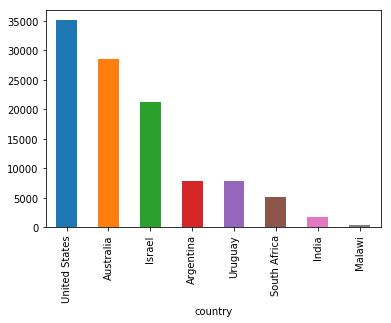

In [13]:
df['GDP percap'].plot(kind='bar')

#### Useful statistical methods :

- Moments
    - Average: .mean()
    - Variance(std): .var(), .std()
    - Skewness: .skew()
    - Kurtosis: .kurtosis()
    - Covariance, Correlation: .cov(), corr()

In [14]:
df.describe()

,population,total GDP,GDP percap
count,8.000000e+00,8.000000e+00,8.000000
mean,1.763826e+08,1.606312e+06,13448.569581
std,3.479223e+08,3.397025e+06,13047.950117
min,3.219793e+06,5.026222e+03,425.896679
25%,1.037977e+07,1.032544e+05,4211.316944
50%,2.819442e+07,2.611573e+05,7873.599852
75%,1.043411e+08,8.383896e+05,22963.112877
max,1.006300e+09,9.898700e+06,35080.381854


In [15]:
df.mean()

population    1.763826e+08
total GDP     1.606312e+06
GDP percap    1.344857e+04
dtype: float64

## Additional useful features

- Pandas provides useful functions, expecially for time series data.
- resample
- rolling

In [16]:
df = pd.read_csv('data/test.csv', 
                 index_col=0, 
                 )
df.head()

,price,volume,buy,sell
2018-11-21 09:00:04.278571,266.200012,1.0,0.0,1.0
2018-11-21 09:00:08.557143,266.200012,1.0,0.0,1.0
2018-11-21 09:00:12.835714,266.250000,21.0,21.0,0.0
2018-11-21 09:00:17.114286,266.299988,1.0,1.0,0.0
2018-11-21 09:00:21.392857,266.350006,2.0,2.0,0.0


t : 분
h : 시간
d : 일
w : 주
    first
    last
    sum

In [17]:
# (1) Sample every 5 minutes
print(df.index)
df.price.resample('5t').ohlc().dropna() #rise error since the index is note datetime.index

Index(['2018-11-21 09:00:04.278571', '2018-11-21 09:00:08.557143',
       '2018-11-21 09:00:12.835714', '2018-11-21 09:00:17.114286',
       '2018-11-21 09:00:21.392857', '2018-11-21 09:00:25.671429',
       '2018-11-21 09:00:29.950000', '2018-11-21 09:00:34.228571',
       '2018-11-21 09:00:38.507143', '2018-11-21 09:00:42.785714',
       ...
       '2018-12-28 15:35:54.900000', '2018-12-28 15:35:25.950000',
       '2018-12-28 15:35:55.900000', '2018-12-28 15:35:16.966667',
       '2018-12-28 15:35:36.933333', '2018-12-28 15:35:56.900000',
       '2018-12-28 15:35:27.950000', '2018-12-28 15:35:57.900000',
       '2018-12-28 15:35:28.950000', '2018-12-28 15:35:58.900000'],
      dtype='object', length=865030)


TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'Index'

In [ ]:
df.index=pd.to_datetime(df.index)
df.price.resample('5t').ohlc().dropna().head()

In [ ]:
df.price.resample('1d').ohlc().dropna().head()

In [ ]:
df.price.resample('1d').apply(lambda x : x.max()/x.min()).dropna().head()

In [ ]:
def max_min_ratio(x) :
    return x.max()/x.min()

df.price.resample('1d').apply( max_min_ratio).dropna().head()

In [ ]:
import matplotlib.pyplot as plt

daily = df.price.resample('1d').ohlc().dropna()
plt.plot(daily.close)
plt.plot(daily.close.rolling(5).mean())
plt.plot(daily.close.rolling(20).mean(), 'r')
plt.plot(daily.close.rolling(60).mean(), 'y')